In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [62]:
file_name = 'pre_processado_completo.csv'

df = pd.read_csv(file_name, header=0, error_bad_lines=False, warn_bad_lines=False)

In [63]:
df.head()

city state country     shape  duration_m  \
0  san marcos    tx      us  cylinder   45.000000   
1        edna    tx      us    circle    0.333333   
2     kaneohe    hi      us     light   15.000000   
3     bristol    tn      us    sphere    5.000000   
4     norwalk    ct      us      disk   20.000000   

                                            comments   latitude   longitude  \
0  This event took place in early fall around 194...  29.883056  -97.941111   
1  My older brother and twin sister were leaving ...  28.978333  -96.645833   
2  AS a Marine 1st Lt. flying an FJ4B fighter/att...  21.418056 -157.803611   
3  My father is now 89 my brother 52 the girl wit...  36.595000  -82.188889   
4  A bright orange color changing to reddish colo...  41.117500  -73.408333   

         date  
0  1949-10-10  
1  1956-10-10  
2  1960-10-10  
3  1961-10-10  
4  1965-10-10

In [64]:
df_us = df.loc[df['country'] == 'us']
df_us.head()

city state country     shape  duration_m  \
0  san marcos    tx      us  cylinder   45.000000   
1        edna    tx      us    circle    0.333333   
2     kaneohe    hi      us     light   15.000000   
3     bristol    tn      us    sphere    5.000000   
4     norwalk    ct      us      disk   20.000000   

                                            comments   latitude   longitude  \
0  This event took place in early fall around 194...  29.883056  -97.941111   
1  My older brother and twin sister were leaving ...  28.978333  -96.645833   
2  AS a Marine 1st Lt. flying an FJ4B fighter/att...  21.418056 -157.803611   
3  My father is now 89 my brother 52 the girl wit...  36.595000  -82.188889   
4  A bright orange color changing to reddish colo...  41.117500  -73.408333   

         date  
0  1949-10-10  
1  1956-10-10  
2  1960-10-10  
3  1961-10-10  
4  1965-10-10

In [65]:
lat_lon = np.array(df_us[['longitude', 'latitude']]).astype(float)

In [66]:
print(len(lat_lon))
print(lat_lon)

68055
[[ -97.9411111   29.8830556]
 [ -96.6458333   28.9783333]
 [-157.8036111   21.4180556]
 ...
 [ -97.4777778   35.6527778]
 [ -82.6958333   34.3769444]
 [ -80.1436111   26.1219444]]


In [67]:
states = list(df_us['state'])

In [48]:
pesos = [states.count(s) for s in states]

In [96]:
kmeans = KMeans(n_clusters=19, max_iter=2000)
scaler = MinMaxScaler()
kmeans.fit(scaler.fit_transform(lat_lon), sample_weight=pesos)
lat_lon_scaled = np.array(scaler.fit_transform(lat_lon))
lat_lon_scaled

array([[0.71027257, 0.22622871],
       [0.72196002, 0.20905126],
       [0.17012595, 0.06550849],
       ...,
       [0.71445329, 0.3357752 ],
       [0.84783257, 0.31155167],
       [0.87086158, 0.1548186 ]])

In [97]:
centers = kmeans.cluster_centers_
centers

array([[0.79975755, 0.4549904 ],
       [0.49605838, 0.38363321],
       [0.86488876, 0.16110265],
       [0.4960063 , 0.55126512],
       [0.91624294, 0.42442631],
       [0.72163949, 0.22249464],
       [0.85909364, 0.32422503],
       [0.53041845, 0.30316902],
       [0.17402014, 0.0588223 ],
       [0.63444139, 0.41346611],
       [0.24834405, 0.83367635],
       [0.76887187, 0.51542914],
       [0.84956881, 0.21010394],
       [0.76515343, 0.38255354],
       [0.92867505, 0.46804494],
       [0.71502994, 0.28541895],
       [0.59018527, 0.29319215],
       [0.85882641, 0.45209232],
       [0.83495052, 0.40675149]])

In [98]:
locations = kmeans.labels_.astype(float)
print(len(locations))
locations

68055


array([ 5.,  5.,  8., ..., 15.,  6.,  2.])

Text(0, 0.5, 'Longitude')

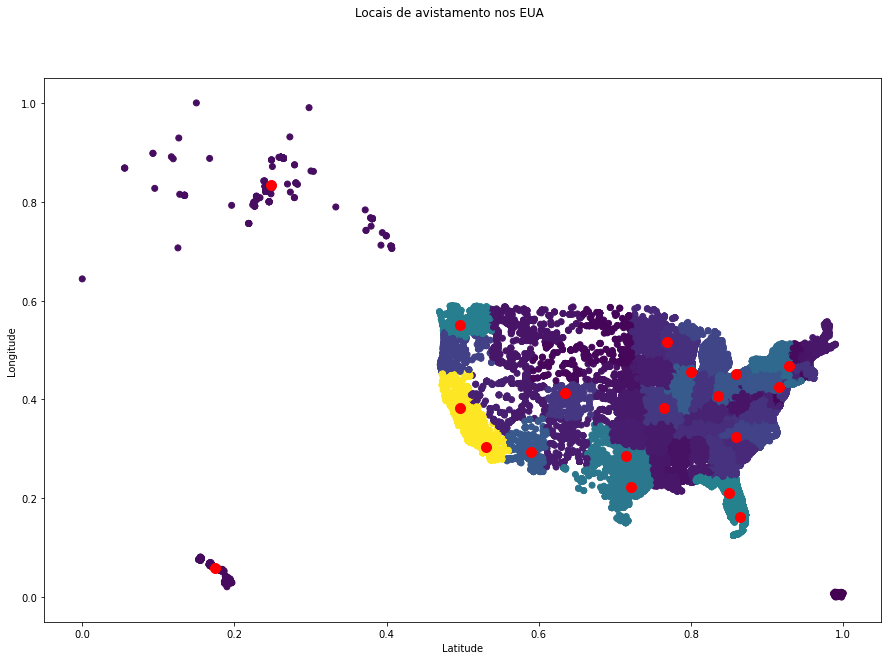

In [99]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(lat_lon_scaled[:, 0], lat_lon_scaled[:, 1], c=pesos)
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
fig.suptitle('Locais de avistamento nos EUA')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

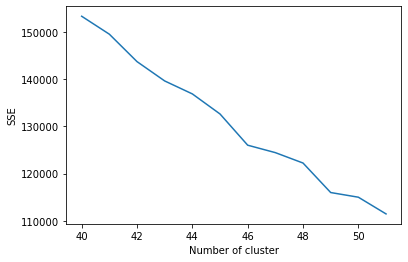

In [89]:
from sklearn.cluster import KMeans
sse = {}
for k in range(40, 52):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(lat_lon)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

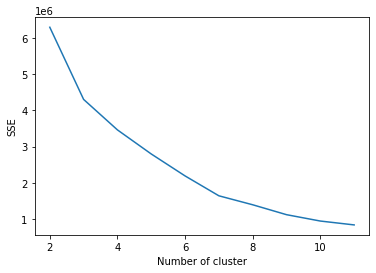

In [90]:
from sklearn.cluster import KMeans
sse = {}
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(lat_lon)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

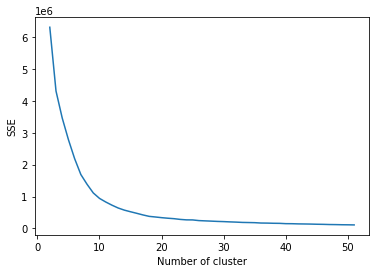

In [95]:
from sklearn.cluster import KMeans
sse = {}
for k in range(2, 52):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(lat_lon)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()